In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Times New Roman",
    "font.size": 10
})

In [2]:
U_N=400
U_L=85
n=1400/60
f=50
ue=U_N/U_L

In [3]:
I1=[1,2,3,4,4.2,5]
P_A=[0,-8,-16,-28,-28,-30]
P_B=[28,100,210,380,420,500]
P_1=[]
U=[27.5,55,82,107,113,134]
G=[35,85,222,426,464,685]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000

# pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/anlaufmoment.tex", index=False)
pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"])

/tmp/ipykernel_6447/2253211394.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/anlaufmoment.tex", index=False)


,$$I_1[A]$$,$$P_A[W]$$,$$P_B[W]$$,$$P_1[W]$$,$$U[V]$$,$$G[g]$$,$$M_{an}[Nm]$$
0,1.0,0,28,28,27.5,35,0.137340
1,2.0,-8,100,92,55.0,85,0.333540
2,3.0,-16,210,194,82.0,222,0.871128
3,4.0,-28,380,352,107.0,426,1.671624
4,4.2,-28,420,392,113.0,464,1.820736
5,5.0,-30,500,470,134.0,685,2.687940


0.00019869525677184566 -0.007889440176336464 0.19097760435537015  
0.1511 x - 0.07306
korrelation koeffizient - U^2:  0.9978360276274119
korrelation koeffizient - U:  0.969394643823287


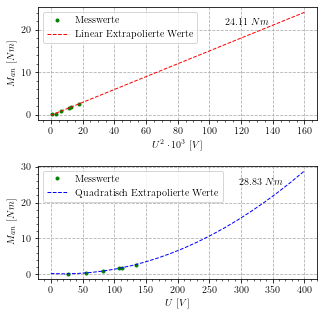

In [4]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{an} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/anlaufmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])

In [5]:

I1=[1,2,3,4,4.2,5]
P_A=[8,28,60,110,125,180]
P_B=[16,74,320,560,620,866]
P_1=[]
U=[36,73,108,140,148,175]
G=[32,218,508,891,1000,1425]
M_an=[]

data=[]
for x in range(len(I1)):
    P_1.append(P_A[x]+P_B[x])
    M_an.append(G[x]*0.001*9.81*0.4)
    data.append([I1[x],P_A[x],P_B[x],P_1[x],U[x],G[x],M_an[x]])

U1=[]
for u in range(len(U)):
    U1.append(U[u]*U[u])
    U1[u] = U1[u]/1000
# pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/kippmoment.tex", index=False)
pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"])

/tmp/ipykernel_6447/3830673600.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(data, columns=["$$I_1[A]$$","$$P_A[W]$$","$$P_B[W]$$","$$P_1[W]$$","$$U[V]$$","$$G[g]$$","$$M_{an}[Nm]$$"]).to_latex("tables/kippmoment.tex", index=False)


,$$I_1[A]$$,$$P_A[W]$$,$$P_B[W]$$,$$P_1[W]$$,$$U[V]$$,$$G[g]$$,$$M_{an}[Nm]$$
0,1.0,8,16,24,36,32,0.125568
1,2.0,28,74,102,73,218,0.855432
2,3.0,60,320,380,108,508,1.993392
3,4.0,110,560,670,140,891,3.496284
4,4.2,125,620,745,148,1000,3.924000
5,5.0,180,866,1046,175,1425,5.591700


0.00019760559353014713 -0.0024495252605790723 -0.03584156310250967  
0.1863 x - 0.1431
korrelation koeffizient - U^2:  0.999921462865454
korrelation koeffizient - U:  0.9802427097922082


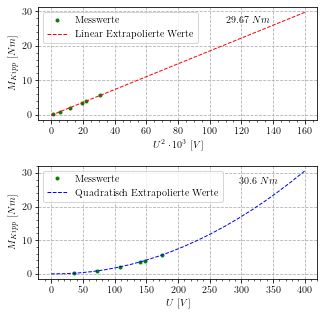

In [6]:
plt.figure(figsize=(5,5))
# plt.title(r"\textsc{Kippmoment}", fontsize=20)
a, b, c = np.polyfit(U, M_an, 2)
y_pred = np.polyval([a, b, c], U)    # y_pred refers to predicted values of y

# # now use the model polynomial to generate y values based on x values outside 
# # the range of the original data:
x_out = np.linspace(0, 160, 20)   # choose 20 points, 10 in, 10 outside original range
x_out_poly = np.linspace(0, 400, 20)   # choose 20 points, 10 in, 10 outside original range
y_pred = np.polyval([a, b, c], x_out_poly)

z = np.polyfit(U1, M_an, 1)
p = np.poly1d(z)

plt.subplot(2, 1, 1)
plt.xlabel("$U^2 \cdot 10^3 \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(p(x_out)), 2)}\ Nm$', xy=(110, max(p(x_out))-3))
plt.plot(U1,M_an, 'g.', label="Messwerte")
plt.plot(x_out, p(x_out), 'r--', label="Linear Extrapolierte Werte", linewidth=1)


plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
plt.subplots_adjust(hspace=0.4)

plt.subplot(2, 1, 2)
plt.xlabel("$U \ [V]$")
plt.ylabel("$M_{Kipp} \ [Nm]$")
plt.annotate(f'${round(max(y_pred), 2)}\ Nm$', xy=(297, max(y_pred)-4))
plt.plot(U,M_an, 'g.', label="Messwerte")
plt.plot(x_out_poly, y_pred, 'b--', label="Quadratisch Extrapolierte Werte", linewidth=1)

plt.minorticks_on()
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/kippmoment.pdf")
print(a,b,c,p)
print("korrelation koeffizient - U^2: ", np.corrcoef(U1,M_an)[0][1])
print("korrelation koeffizient - U: ", np.corrcoef(U,M_an)[0][1])

### 5.4 Trennung von Eisen- und Reibungsverlusten

In [7]:
I_0=np.array([2.75,1.7,1.1,0.58])
P_A=np.array([-440,-200,-70,-8])
P_B=np.array([680,340,150,52])
P_0=P_A+P_B
U=np.array([400,300,200,100])
U_pow2=U**2
n_min=np.array([1493,1490,1485,1461])
n_sec=n_min/60
P_Cu=3*I_0*2.32
P_FeReib=P_0-P_Cu
data=[]

for x in range(len(U)):
    data.append([I_0[x],P_0[x],P_Cu[x],P_FeReib[x],U[x],n_min[x]])
# pd.DataFrame([I_0,P_0,P_Cu,P_FeReib,U,n_min], columns=["I1","P_A","P_B","P_1","U","G"])
# pd.DataFrame(data, columns=["$$I_0[A]$$","$$P_0[W]$$","$$P_{Cu}[W]$$","$$P_{Fe+Reib}[W]$$","$$U[V]$$","$$n[min]$$"]).to_latex("tables/trennung_eisen_reib.tex", index=False)
pd.DataFrame(data, columns=["$$I_0[A]$$","$$P_0[W]$$","$$P_{Cu}[W]$$","$$P_{Fe+Reib}[W]$$","$$U[V]$$","$$n[min]$$"])

/tmp/ipykernel_6447/1538698414.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(data, columns=["$$I_0[A]$$","$$P_0[W]$$","$$P_{Cu}[W]$$","$$P_{Fe+Reib}[W]$$","$$U[V]$$","$$n[min]$$"]).to_latex("tables/trennung_eisen_reib.tex", index=False)


,$$I_0[A]$$,$$P_0[W]$$,$$P_{Cu}[W]$$,$$P_{Fe+Reib}[W]$$,$$U[V]$$,$$n[min]$$
0,2.75,240,19.1400,220.8600,400,1493
1,1.70,140,11.8320,128.1680,300,1490
2,1.10,80,7.6560,72.3440,200,1485
3,0.58,44,4.0368,39.9632,100,1461


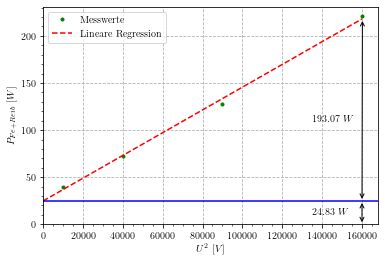

In [8]:
z=np.polyfit(U_pow2,P_FeReib,1)
p=np.poly1d(z)
U_=np.linspace(0,160000,20)
plt.figure(figsize=(6,4))
plt.plot(U_pow2,P_FeReib, 'g.', label="Messwerte")
plt.plot(U_,p(U_), 'r--', label="Lineare Regression")
plt.axhline(y=p(0), color='b', linestyle='-')
plt.annotate(f'${round(p(0), 2)}\ W$', xy=(max(U_)-25000, p(0)-15))
plt.annotate(f'${round(max(p(U_))-p(0), 2)}\ W$', xy=(max(U_)-25000, max(p(U_))/2))
plt.annotate("", xy=(max(U_)+max(p(U_)),max(p(U_))),xycoords='data',
            xytext=(max(U_)+p(0), p(0)), textcoords='data',
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))

plt.annotate("", xy=(max(U_)+p(0),p(0)),xycoords='data',
            xytext=(max(U_), 0), textcoords='data',
            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.minorticks_on()
plt.xlabel("$U^2 \ [V]$")
plt.ylabel("$P_{Fe+Reib} \ [W]$")
plt.grid(linestyle="--", which='major')
plt.legend()
# plt.savefig("figures/trennung_eisen_reib.pdf")